<a href="https://colab.research.google.com/github/maduprey/DelayExplore/blob/master/mol_topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# View Protein Topology


In [55]:
!pip install -q git+https://github.com/azlawson/PersistenceCurves.git
!pip install -q biopython
!pip install -q py3Dmol
!pip install -q scikit-tda

In [56]:
import os
import numpy as np
import persistencecurves as pc
import matplotlib.pyplot as plt
import py3Dmol
import random

from Bio.PDB import PDBParser
from ripser import ripser
from persim import plot_diagrams

In [57]:
parser = PDBParser(PERMISSIVE=1, QUIET=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/data')

Define functions

In [58]:
def view_mol(file):
    """
    Given a file path to PDB .ent file, parse it and return visual 3D structure
    """
    file_name = os.path.split(file)[1]
    structure_id = os.path.splitext(file_name)[0] 
    structure = parser.get_structure(structure_id, file)
    pdb_id = parser.get_header()['astral']['Source-PDB']

    mol = py3Dmol.view(query='pdb:'+pdb_id)
    mol.setStyle({'cartoon':{'color':'spectrum'}})

    return mol.render()

In [59]:
def compute_persist(file):
    """
    Given a file path to PDB .ent file, compute persistent homology and
    return life curves for H_0, H_1, H_2
    """
    file_name = os.path.split(file)[1]
    structure_id = os.path.splitext(file_name)[0] 
    structure = parser.get_structure(structure_id, file)

    # Generate a list of its atoms' coordinates in R^3
    coords = []
    for atom in structure.get_atoms():
        coords.append(list(atom.get_vector()))
    coords = np.array(coords)

    # Compute persistent homology
    # We roughly use the median number of atoms to set the subsampling threshold 
    if len(coords) > 1300:
        diagram = ripser(coords, maxdim=2, thresh=10, do_cocycles=False, n_perm=1300)['dgms']
    else:
        diagram = ripser(coords, maxdim=2, thresh=10, do_cocycles=False)['dgms']

    # Generate persistence curves from diagrams
    d_h0 = pc.Diagram(Dgm=diagram[0], globalmaxdeath=10, inf_policy='remove')
    d_h1 = pc.Diagram(Dgm=diagram[1], globalmaxdeath=10, inf_policy='remove')
    d_h2 = pc.Diagram(Dgm=diagram[2], globalmaxdeath=10, inf_policy='remove')

    # Generate life curves
    lc_h0 = d_h0.lifecurve(meshstart=0, meshstop=10, num_in_mesh=100)
    lc_h1 = d_h1.lifecurve(meshstart=0, meshstop=10, num_in_mesh=100)
    lc_h2 = d_h2.lifecurve(meshstart=0, meshstop=10, num_in_mesh=100)

    # Join life curves together
    lc_all = np.concatenate((lc_h0, lc_h1, lc_h2))

    return lc_all

## Select files

In [76]:
file_1 = './SCOP40mini/' + random.choice(os.listdir('./SCOP40mini/'))

In [85]:
file_2 = './SCOP40mini/' + random.choice(os.listdir('./SCOP40mini/'))

## View files

In [77]:
view_mol(file_1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [86]:
view_mol(file_2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

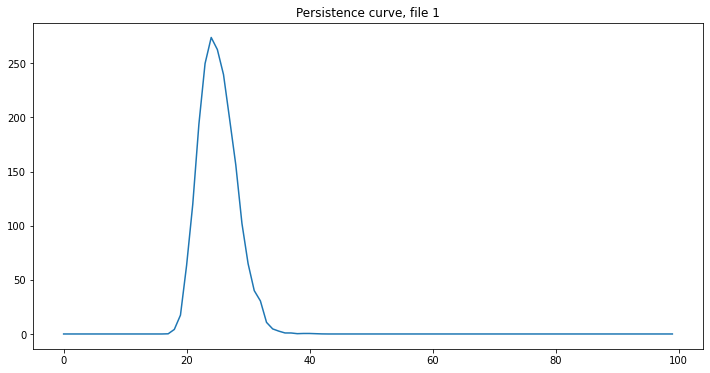

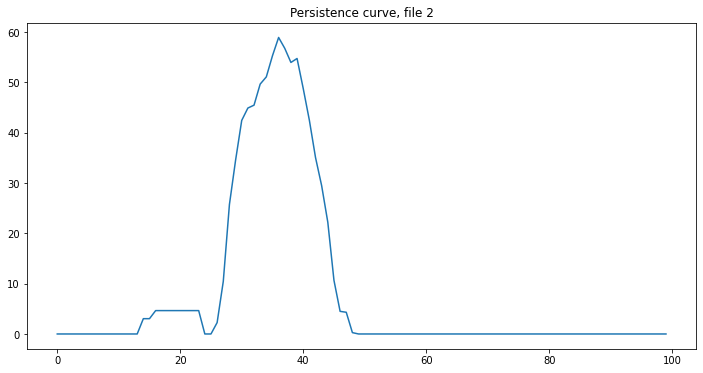

In [87]:
# 0-100:    H_0
# 100-200:  H_1
# 200-300:  H_3
hom = range(100, 200)

# File 1
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(compute_persist(file_1)[hom])
ax.set_title('Persistence curve, file 1')
plt.show()

# File 2
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(compute_persist(file_2)[hom])
ax.set_title('Persistence curve, file 2')
plt.show()